# Hinweise zur Nutzung der Jupyter-Notebooks
In diesem Praktikum sollt ihr die Auswertung der Versuche mit diesen euch zur Verfügung gestellten Jupyter-Notebooks durchführen. Es würde weit über das Ziel hinausschießen und auch nicht zielführend sein, euch eine vollständige Einführung in alle Module von Python und deren Befehlen zu geben. Sehr viele Module sind euch bereits aus vorherigen Veranstaltungen vertraut, sodass diese in den Jupyter-Notebooks während dieses Praktikums vorausgesetzt werden. Da man jedoch üblicherweise schnell wieder vergisst, welche Kompetenzen man wann gelernt hat, soll nachfolgend ein Überblick gegeben werden, _wann_ _was_ vermittelt wurde. Hierdurch könnt ihr schnell nachschlagen, wie bspw. ein Datensatz eingeselen wird, ohne dass es jedesmal zu Beginn eines Notebooks erklärt werden muss. 

__Weiter unten unter [Weiterführendes](#Weiterführendes) werden einige hilfreiche Hinweise gegeben, die euch die Auswertung im Praktikum sicher erleichtern.__

Da die Jupyter-Notebooks dieses Jahr noch nicht verpflichtend waren, ist auf Wunsch des vorherigen Durchgangs ein kleiner Crashkurs zur Wiederholung unten nach den Ratschlägen aufgeführt. _Dieser ist explizit nicht zum "copy+paste"n gedacht, sondern als Schnelleinstieg zum Erinnern._ Insbesondere soll dadurch deutlich werden, auf welche Befehle angespielt werden könnte und wie der allgemeine Aufbau der Auswertungsschritte ist. Die Reihenfolge der Schritte unterscheidet sich natürlich je nach Versuch deutlich!

# Allgemeiner Aufbau

## Bekannt aus MfC I
### Übung 1
- Das definieren von Funktionen mit <code> def abc(xyz):</code>
- Das Ausgeben von Variablen mit <code>print()</code>
- Mehridmensionale Arrays indexieren
- Die Existenz von NumPy
- Einfache Auftragungen anfertigen
- Einlesen von Datensätzen

### Übung 2
- Symbolische Algebra mit SymPy
- Unterauftragungen

# Übung 3
- Lineare Regressionen (bevorzugt mit <code>linregress()</code>

## Bekannt aus MfC II
- Vertiefte symbolische Algebra mit SymPy
- Weitere Pyplot-Befehle

# Weiterführendes
## Naturkonstanten
Ihr werdet sehr oft während der Auswertung verschiedene Naturkonstanten benötigen. Deren Werte müsst ihr jedoch nicht nachschlagen, stattdessen könnt ihr sie aus [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html) importieren. Benötigt ihr beispielsweise die Faraday-Konstante, so könnt ihr diese mit

In [ ]:
from scipy import constants
F = constants.value(u'Faraday constant')
print("Faraday-Konstante: "+str(F)+" C/mol")

importieren. Für einige Konstanten wie $k_\mathrm{B}$, $R$ oder $N_\mathrm{A}$ gibt es auch die syntaxkürzere Option

In [ ]:
from scipy.constants import Boltzmann,R,Avogadro as k_B,R,N_A

## Dezimaltrennzeichen
Das Dezimaltrennzeichen sollte in euren Datensätzen ein Punkt sein, Kommas müssten entweder manuell oder mittels Python konvertiert werden (siehe [Internetrecherche](https://github.com/numpy/numpy/issues/13810#issuecomment-504675321), <code>converters</code> klappt auch mit einem anderen euch bekannten NumPy-Befehl und das Modul <code>io</code> ist _nicht_ notwendig).

## NumPy-Arrays
In den vorherigen Module habt ihr bereits sehr viel mit NumPy-Arrays gearbeitet ohne es direkt zu merken. Warum ist es wichtig auf NumPy-Arrays hinzuweisen? Die Handhabung von NumPy- und „normalen“ Python-Arrays unterscheidet sich in einigen Punkten. Ein wichtiger Unterschied wird nachfolgend verdeutlicht.

In [1]:
import numpy as np
python_array = [1,2,3,4]
numpy_array  = np.array([1,2,3,4])

print(numpy_array*3)
print(numpy_array/3)
print(python_arra#y*3)
print(python_array/3)


SyntaxError: '(' was never closed (1472458255.py, line 7)

Ein NumPy-Array ermöglicht es uns, die Werte im Array mit einer Variable zu multiplizieren, während das Python-Array dreimal ausgegeben wurde. _Daher werdet ihr immer eine Fehlermeldung erhalten, wenn ihr ein Python-Array mit einer Fließkommazahl multipliziert oder eine Division eine Kommazahl ergäbe_. Ein NumPy-Array bleibt auch nach den Rechenschritten ein NumPy-Array, es muss also nur einmal <code>np.array()</code> getippt werden.

Hilfreich sind ebenfalls die [printoptions](https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html#numpy.set_printoptions) von NumPy. Oftmals reichen uns die ersten vier Nachkommastellen um die Genauigkeit des Fehlers abschätzen zu können, sodass wir uns nicht alle Zahlen anzeigen lassen müssen. Hierdurch bleiben die Ergebnisse übersichtlich. _Manuelles formatieren mittels Python-Syntax ist selbstverständlich weiterhin möglich und ermöglicht präzisere Einstellungen._ Allerdings muss die manuelle Formatierung jedesmal neu angewandt werden, während für die printoptions ein einmaliger Aufruf des Befehls ausreicht.

Auch kann der Befehl [column_stack](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html) nützlich sein, wenn in einem Array die Werte und in anderem Array die Unsicherheiten sind und man sich die Werte jeweils nebeneinander in Spalten anzeigen lassen möchte.

In [2]:
#Messwerte, Unsicherheiten
import numpy as np
data = np.array([[112.34567890987654321,0.123987],
                 [234.56789876543,0.3456421],
                 [432.19876543210,0.981234509876533]])
print(np.array2string(data,separator= " ± "))
np.set_printoptions(precision=4)
print(np.array2string(data,separator= " ± "))
print("")

#Zum netten Kombinieren der beiden Arrays
print("Column_stack")
print("Messwert ± Unsicherheit")
print("-----------------------")
werte = np.array([39.99034853098,56.5558209,99.9404823])
unsicherheit = np.array([1.292982,2.24394,3.54935])
kombiniert = np.column_stack([werte,unsicherheit])
print(np.array2string(kombiniert,separator= " ± "))


[[1.12345679e+02 ± 1.23987000e-01] ±
 [2.34567899e+02 ± 3.45642100e-01] ±
 [4.32198765e+02 ± 9.81234510e-01]]
[[1.1235e+02 ± 1.2399e-01] ±
 [2.3457e+02 ± 3.4564e-01] ±
 [4.3220e+02 ± 9.8123e-01]]

Column_stack
Messwert ± Unsicherheit
-----------------------
[[39.9903 ±  1.293 ] ±
 [56.5558 ±  2.2439] ±
 [99.9405 ±  3.5494]]


## Statistik mit NumPy
Ihr werdet während eines Praktikums sehr oft (fehlergewichtete) Mittelwerte, Standardabweichungen, etc. berechnen. Macht euch das Leben angenehmer und nutzt die bereits vorhandenen Befehle in NumPy. Bedenkt bei Größen wie der Standardabweichung, dass ihr die empirische Standardabweichung nutzen müsst und somit <code>ddof=1</code> zu nutzen ist.

In [3]:
werte = np.array([1,2,3,4,98,7,65,43,21])
falsch = np.std(werte)
richtig = np.std(werte,ddof=1)
print("Falsch: "+str(falsch))
print("Richtig: "+str(richtig))

mittelwert = np.mean(werte)

Falsch: 32.63074366450702
Richtig: 34.61013018049934


## Grafiken formatieren und exportieren
Die wichtigen Befehle zum Setzen der Achsengrenzen, Beschriftungen, Fehlerbalken, etc. habt ihr bereits kennengelernt.
Nicht vermittelt wurde, wie man die Größe, Auflösung, Schriftgrößen und Schriftart in Abbildungen setzt.
### Bildgröße
Theoretisch ist es nicht von großer Bedeutung, ob ihr eure Abbildung in der Größe einer Karteikarte oder einem A0-Poster erstellt. In der Praxis wäre eine Schriftgröße 12 auf der Karteikarte relativ groß, während auf einem A0-Poster Schriftgröße 12 man nur aus nächster Nähe lesen könnte, sodass sinnvolle Werte zu wählen sind. In Python wird die Bildgröße in Inches angegeben. Ein praktikabler Wert ist bspw. eine Breite von 6&nbsp;in und eine Höhe von 4&nbsp;in.

### Dateiformate
Grundsätzlich sind Vektorgrafikformate wie __PDF__, __EPS__, SVG oder PGF gegenüber Rastergrafikformaten wie __PNG__ oder JPEG fast immer zu bevorzugen. Der Grund ist, dass Vektorgrafiken eine „unendliche“ Auflösung besitzen, da sie aus Vektoren bestehen, die beliebig skaliert werden können, während Rastergrafiken aus einzelnen Bildpunkten ein Raster bilden. Falls ihr dennoch eine Rastergrafik nutzt, achtet darauf eine hohe, aber keine exorbitant hohe Auflösung zu setzen. Die Auflösung wird in [dpi](https://de.wikipedia.org/wiki/Punktdichte) eingestellt. Während <code>dpi=50</code> viel zu niedrig ist, wird mit <code>dpi=600</code> bereits eine hohe Auflösung erzielt, während <code>dpi=3000</code> ein „Overkill“ wäre, der zu unnötig großen Dateien führt.

Grafiken werden mit dem Befehl <code>savefig</code> aus PyPlot als Dateien gespeichert, die Dateiendung muss mit dem Dateinamen angegeben werden.

### Schriftformatierung
Hierfür gibt es verschiedene Optionen. Eine Möglichkeit ist, ihr übergebt hinter jedem Befehl die Schriftgröße als <code>size=...</code> in der Klammer als Option. Dies bietet sich bei wenigen Auftragungen aufeinmal an. 

_Für Fortgeschrittene_ bietet es sich an, zu Beginn eines jeden Pythonskripts in einer Präampel die sogenannten [rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html) von Matplotlib an. Hierdurch kann für alle Auftragungen in einem Skript die Bildgröße, Schriftgrößen, Schriftart, … formatiert werden. Bei einer lokalen $\TeX$-Installation können auch $\LaTeX$-Pakete wie <code>siunitx</code>, <code>unicode-math</code>, etc. eingebunden werden.

Auch könnt ihr mit $\LaTeX$ die Achsenbeschriftung formatieren. Dies ist insbesondere dann hilfreich, wenn ihr Brüche als Achsenbeschriftung habt oder die Einheiten angeben wollt. Nachfolgend ist ein (eher zu Demonstrationszwecken) formatiertes Beispiel gezeigt.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.use("pgf")
plt.rcParams.update({"text.usetex": True,"legend.fontsize":6})
y = np.arange(1,17,2)
x = np.linspace(1,100,8)
fig = plt.figure(figsize=(6,6))
plt.plot(x,y,label="Linear")
plt.plot(x,y**2,label="Quadratisch")
plt.xlabel(r"$\lambda_{\mathrm{Irgendwas}}$ / $\mathrm{m}\cdot\mathrm{kg}\cdot \mathrm{s}^{-6}$",size=8)
plt.ylabel(r"$\int\limits_{0}^{\infty}\ln\left(\frac{\iota}{k_\mathrm{B}}\right)$",size=25)
plt.legend()
plt.title("Testgrafik")
plt.tight_layout()
plt.savefig("einfache_formatierung.pdf")
plt.close()

### Unterscheidbarkeit von Datenkurven
Vermutlich werdet ihr eure Protokolle nicht in Farbe, sondern in Graustufen ausdrucken um u.&nbsp;a. Druckkosten zu sparen. _Beherzigt den nachfolgenden Ratschlag wenn möglich auch bei Farbausdrucken!_ Es stehen euch mehr [Marker](https://matplotlib.org/stable/api/markers_api.html) zur Verfügung als nur Kreise. Indem ihr _jeder_ Datenkurve einen _eigenen_ Markerstil und wenn sinnvoll auch einen eigenen [Linienstil](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) gebt, können auch bei einem reinen schwarz-weiß-Druck die einzelnen Kurven leicht voneinander unterschieden werden (rot, blau und schwarz ergeben in Graustufen oft nur schwer unterscheidbare Grautöne und Menschen mit Rot-Grün-Sehschwäche danken euch, wenn ihr rot und grün in einer Abbildung vermeidet). Dies soll nachfolgendes Beispiel von einer Auftragung des Drucks $p$ bei einer konstanten Temperatur $T$ als Funktion des molaren Volumens $V_\mathrm{m}$.
\begin{align}
    p = \frac{R\cdot T}{V_\mathrm{m}}
\end{align}


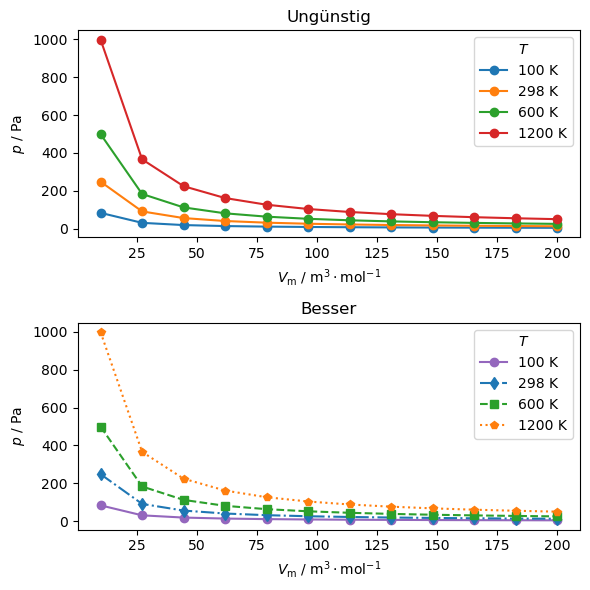

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows=2,figsize=(6,6))
Vm_range = np.linspace(10,200,12)
T_arr = [100,298,600,1200]
marker_arr = ['o','d','s',"p"]
ls_arr = ['-','-.','--',':']
color_arr = ['tab:purple','tab:blue','tab:green','tab:orange']
for i in range(4):
    ax[0].plot(Vm_range,8.314*T_arr[i]/Vm_range,'-o',label=str(T_arr[i]) + " K")
    ax[1].plot(Vm_range,8.314*T_arr[i]/Vm_range,marker=marker_arr[i],ls=ls_arr[i],label=str(T_arr[i]) + " K",color=color_arr[i])
    ax[0].set_title("Ungünstig")
    ax[1].set_title("Besser")
for i in range(2):    
    ax[i].set_xlabel("$V_\mathrm{m}$ / $\mathrm{m}^{3}\cdot\mathrm{mol}^{-1}$")
    ax[i].set_ylabel("$p$ / Pa")
    ax[i].legend(title="$T$")
plt.tight_layout()
plt.show()
plt.close()


# Crashkurs
Nachfolgend gehen wir davon aus, dass Messungen bei den Temperaturen $T$ von 200&nbsp;K, 300&nbsp;K, 400&nbsp;K und 500&nbsp;K von einer roten und einer blauen Substanz durchgeführt wurden. Nachfolgende Größen sind rein erfunden und entsprechen nicht irgendwelchen naturwissenschaftlichen Größen.

Wir nehmen an, wir messen die Größe $f$ als Funktion von $l$ mit den Variablen $\alpha$ und $\beta$. Es gelte der Zusammenhang
\begin{align}
f(l,\alpha,\beta) = l\cdot\exp\left(- \frac{\beta^{4}\cdot l^2}{\alpha}\right)
\end{align}
Uns interessiert die Größe $\zeta$ die wir nach 
\begin{align}
\zeta = (\alpha - \iota)\cdot T
\end{align}
erhalten, $\iota$ interessiert uns nicht. Daraus soll $\psi$ bestimmt werden, welches einfach
\begin{align}
\psi = \zeta + \xi^2
\end{align}
sei. Die Größe $\xi$ sei substanzunabhängig und zu $30\pm 8$ bestimmt worden.

Unter dem Ordner Hilfsdateien findet ihr entsprechende hypothetische Messdaten für die rote und blaue Substanz bei den entsprechenden Temperaturen.

Wie immer sollen die für uns wichtigen Python-Module importiert werden.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

from sympy import symbols,sqrt,lambdify,diff

Nun sollen die Daten wie bei den Praktikumsversuchen in ein mehrdimensionales Array eingelesen werden. Wir haben $l$ Substanzen untersucht bei $n$ Temperaturen und die Messdaten enthalten $k$ Zeilen und $j$ Messgrößen. Diese sollen in einem einzigen Array gespeichert werden, wozu zunächst ein leeres NumPy-Array mit den entsprechenden Dimensionen erstellt wird.

Während der eigenen Auswertung könnt ihr selbstverständlich hiervon abweichen. _Meist_ ist jedoch angedacht, alle Daten in einem mehrdimensionalen Array zu haben.

In [6]:
#2 da rot und blau
#4 da 200,300,400,500 
#10**3, da so viele einzelne Messpunkte in der Datei sind
#2 da x=l und y=f ist und keine weiteren Größen in der Datei aufgeführt sind
l,n,k,j = 2,4,10**3,2
messdaten = np.empty((l,n,k,j))

Nun wollen wir uns die Vorzüge von <code>enumerate</code>- und <code>for</code>-Schleifen zu Nutze machen und alle Daten nun einlesen. Hierfür machen wir uns die sinnvolle Benennung der Dateien zu Nutze:

In [7]:
temperaturen = np.array([200,300,400,500])
for index,farbe in enumerate(["rot_","blau_"]):
    for index2,temperatur in enumerate(temperaturen):
        messdaten[index,index2,:,:] = np.genfromtxt("Hilfsdateien/"+farbe + str(temperatur)+" K.txt",usecols=(0,1))
#Wer am Datensalat interessiert ist
#print(messdaten)

Der Vorteil ist, dass über dieses mehrdimensionale Array sehr einfach iteriert werden kann und beispielsweise Farbgradienten sich sehr leicht damit umsetzen lassen &ndash; bedenkt, dass Farbgradienten nicht immer sinnvoll sind in Auftragungen! Analog ergäbe es in diesem Beispiel wenig Sinn den Linienstil zu variieren &ndash; die Änderungen wären nicht erkennbar.
Dies soll an nachfolgendem Beispiel verdeutlicht werden. Mittels der Schleife ist es möglich, automatisch auch die Legendeneinträge den einzelnen Kurven zuzuweisen! 

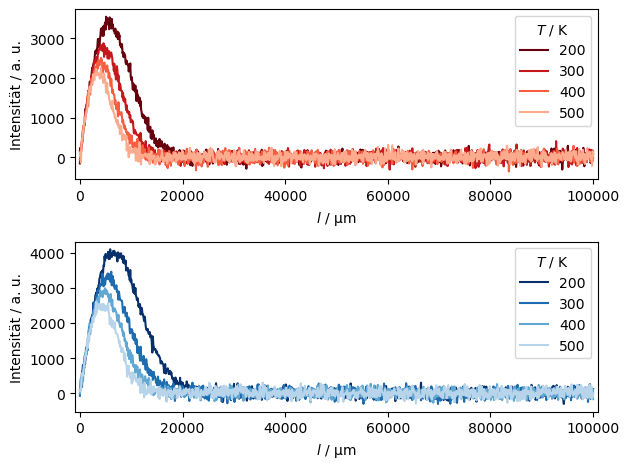

In [8]:
#Zwei Subplots

#n ist die ANzahl der Messungen. Haben wir oben bereits definiert!
farben_rot = plt.cm.Reds(np.linspace(1,0.3,n))
farben_blau = plt.cm.Blues(np.linspace(1,0.3,n))

#Iteriert über l
fig,ax = plt.subplots(2)
for index in np.arange(l):
    #Iteriert über n
    for index2 in np.arange(n):
        x,y = messdaten[index,index2,:,0],messdaten[index,index2,:,1]
        #Falls rot. Alternativ gehen auch zwei for-Schleifen anstatt dieser if-Konstruktion!
        if index == 0:
            ax[0].plot(x,y,color=farben_rot[index2],label=str(temperaturen[index2]))
        #In allen anderen Fällen.
        else:
            ax[1].plot(x,y,color=farben_blau[index2],label=str(temperaturen[index2]) )
#Für beide Subplots soll es eine Legende und x-Achsenbeschriftung geben, etc.
for axs in ax:
    axs.legend(title="$T$ / K")
    axs.set_xlabel("$l$ / µm" )
    axs.set_xlim(-10**3,10**3+10**5)
    axs.set_ylabel(r"Intensität / a. u.")
plt.tight_layout()
plt.show()
plt.close()

Wir gehen davon aus, dass $\beta$ als Aparaturkonstante mit <code>0.01</code> uns bereits gegeben ist. Obige Funktion lässt sich schwer/nicht linearisieren, weswegen mittels <code>curve_fit</code> eine ''nicht''-lineare Regression durchgeführt werden soll. Dies sollte jedoch möglichst vermieden werden, da lineare Regressionen unter anderem aus rechentechnischen Gründen von Computern schneller und weniger fehleranfällig durchgeführt werden können! _Im Praktikum sind daher nahezu alle Regressionen lineare Regressionen!_

Die Ergebnisse und Unsicherheiten (aufgrund der hohen Anzahl an Datenpunkten werden 1.96$\sigma$ für das 95%-Konfidenzintervall genommen) sollen jeweils erneut in einem mehrdimensionalen Array gespeichert werden. Hierzu wird ähnlich wie beim Einlesen der Messdaten vorgegangen.

In [9]:
#Notwendig, damit curve_fit weiß, über welche Funktion 
#eine nicht-lineare Regression durchzuführen ist
def fit_funktion(x,alpha):
    beta = 0.02
    return x*np.exp(-beta**4 * x**2 / alpha)

#n Messungen, 2 da Ergebnis + Unsicherheit
alpha = np.empty((l,n,2))
for index in np.arange(l):
    #Iteriert über n
    for index2 in np.arange(n):
        x,y = messdaten[index,index2,:,0],messdaten[index,index2,:,1]
        #Optimierte Parameter, Kovarianzmatrix
        popt,pcov = curve_fit(fit_funktion,x,y,p0=[100])
        #Die Kovarianzmatrix kann ALS NÄHERUNG zu Standardabweichungen durch Diagonalisierung 
        #der Kovarianzmatrix erhalten werden. Siehe Dokumentation von curve_fit
        #in der SciPy-Dokumentation!
        perr = np.sqrt(np.diag(pcov))
        #[0] nachfolgend notwendig, da das Ergebnis als 1D-Array ausgegeben wird.
        #Dies ist insbesondere bei mehr als einem Fit-Parameter sinnvoll, hier aber
        #etwas ungünstig
        alpha[index,index2,:] =np.array([popt[0],1.96*perr[0]])
#Erst rot, dann blau  
#Relative Unsicherheiten in %
print(alpha[:,:,1]/alpha[:,:,0] * 100)

[[0.7056 0.9752 1.2094 1.3577]
 [0.5257 0.7985 0.9523 1.1586]]


Die Funktion für $\zeta$ kann im Gegensatz zu $f$ jedoch zu
\begin{align}
\alpha = \zeta\cdot \frac{1}{T} - \iota
\end{align}
linearisiert werden, $\zeta$ wird aus der Steigung erhalten. Nachfolgend sollte deutlich werden, warum das Speichern mancher Messbedingungen in Arrays und das iterieren über diese nützlich sein kann!

Wir könnten zwar erneut <code>curve_fit</code> nutzen, es bietet sich jedoch an, <code>linregress</code> aufgrund der einsteigerfreundlicheren Handhabung zu verwenden. Fortgeschritte können <code>scipy.odr</code> nutzen, um eine _fehlergewichtete orthogonale_ Regression durchzuführen. Bei <code>curve_fit</code> gilt es zu beachten, dass zwar eine fehlergewichtete Regression möglich ist, diese jedoch nur die Unsicherheit der _y_-Werte berücksichtigen kann, in der Praxis ist jedoch auch _x_ quasi immer fehlerbehaftet. Als Gewichtungsfaktor müsste der inverse Fehler genutzt werden!

Da die Regression über vier Messungen geht und wir in einer Regression immer $N - 2$ Freiheitsgrade haben, lautet der Studentsche $t$-Faktor 4,303.

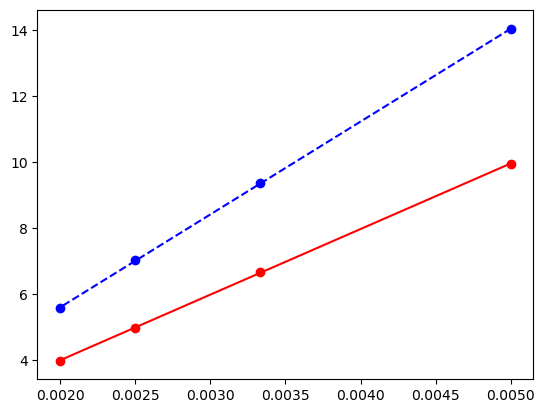

[[1991.0715   38.5194]
 [2818.1583   44.316 ]]
[[ 0.0096  0.1311]
 [-0.0392  0.1509]]


In [10]:
zeta_arr = np.empty((l,2))
iota_arr = np.empty((l,2))
colors = ["r","b"]
ls_arr = ["-","--"]
for index in np.arange(l):
    x = temperaturen
    y = alpha[index,:,0]
    dy = alpha[index,:,1]
    fit = linregress(1/x,y)
    plt.errorbar(1/x,y,yerr=dy,marker='o',ls='None',color=colors[index])
    plt.plot(1/x,fit.slope*1/x + fit.intercept,ls=ls_arr[index],color=colors[index])
    zeta_arr[index,:] = np.array([fit.slope,4.303*fit.stderr])
    iota_arr[index,:] = np.array([fit.intercept,4.303*fit.intercept_stderr])
plt.show()
print(zeta_arr)
print(iota_arr)

Euch sollten nun Werte für $\zeta$ für die rote und blaue Kurve angezeigt werden, die nahe dem eigentlichen Ergebnis vor hinzufügen des künstlichen Rauschen sind, nämlich 2000 und 2800, $\iota$ lag bei null.

Bisher ist <code>sympy</code> noch nicht eingeführt worden, was nun erledigt werden soll. Wir wollen abschließend $\psi$ inklusive der Unsicherheit $\Delta\psi$ bestimmen.
Hierzu wollen wir eine Gauß'sche Fehlerfortpflanzung nutzen, da $\psi$ eine von $\zeta$ unabhängige Größe ist. Dazu wird die Definition von $\psi$ zu Beginn des Crashkurses mittels <code>sympy</code> implementiert. Alle Funktionsvariablen müssen als "Symbole" definiert werden. Nach Definition der Funktion(svariablen), kann man den Computer die jeweiligen Ableitungen berechnen lassen, was insbesondere bei langen Termen _sehr_ hilfreich ist.

In [11]:
zeta,dzeta,xi,dxi = symbols('zeta dzeta xi dxi')

psi = zeta + xi**2
#Gaußsche Fehlerfortpflanzung
dpsi = sqrt((diff(psi,zeta) * dzeta)**2 + (diff(psi,xi)*dxi)**2)

psi = lambdify([zeta,xi],psi,'scipy')
dpsi = lambdify([zeta,dzeta,xi,dxi],dpsi,'scipy')

zeta_rot,dzeta_rot = zeta_arr[0,:]
zeta_blau,dzeta_blau = zeta_arr[1,:]

#Wir überschreiben hier die Definition der Variablen xi oben als Symbol!
#Ungünstiger Stil, da wir xi aber nicht weiter benötigen, möglich.
xi,dxi = 30,8

print("Psi für die rote Substanz")
print(np.array2string(np.array([psi(zeta_rot,xi),dpsi(zeta_rot,dzeta_rot,xi,dxi)]),separator = " +/- "))
print("Psi für die blau Substanz")
print(np.array2string(np.array([psi(zeta_blau,xi),dpsi(zeta_blau,dzeta_blau,xi,dxi)]),separator = " +/- "))

Psi für die rote Substanz
[2891.0715 +/-  481.5431]
Psi für die blau Substanz
[3718.1583 +/-  482.0414]


Damit sollten alle wichtigen Schritte zur Auswertung der Versuche aufgeführt sein.
Besonderheiten wie Integrale oder die Maskierung von Arrays werden in den jeweiligen Versuchen genauer besprochen bzw. auf entsprechende Dokumentationen verwiesen.

---
Arved Dorst, Göttingen, **2022**.